# Final

In [202]:
import sys
sys.path.append("..")

In [204]:
import dynamics
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

### Q1.a.1

(-1.2, 1.0)

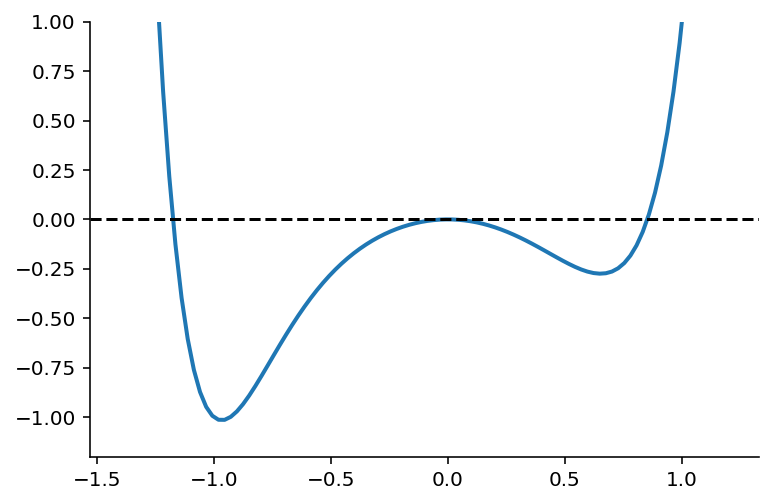

In [17]:
def f(x):
    return x ** 2 * (x ** 6 + x ** 3 - 1)

xrange = np.linspace(-1.4, 1.2, 100)
plt.plot(xrange, f(xrange), linewidth=2);
plt.axhline(y=0, c="black", linestyle="--")
plt.ylim(-1.2, 1)

### Q1.a.2

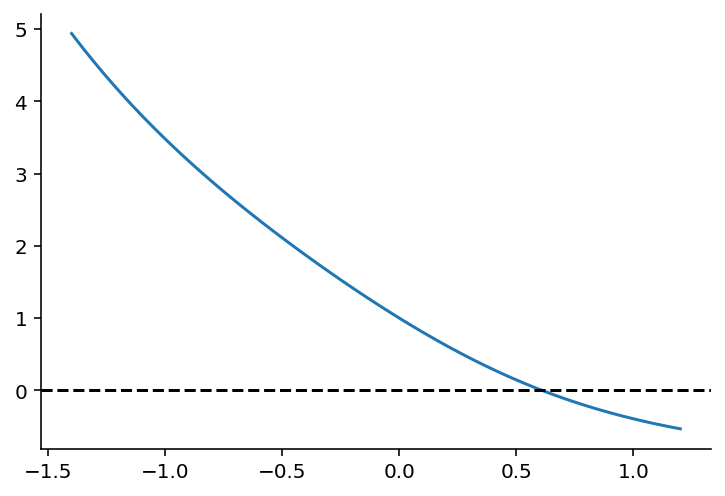

In [155]:
def f(x): return np.exp(-x) - np.tanh(x)
xrange = np.linspace(-1.4, 1.2, 100)

plt.plot(xrange, f(xrange))
plt.axhline(y=0, c="black", linestyle="--")

In [156]:
def bisection(f, xmin, xmax, nits_max=10_000, tol=1e-16):
    a = xmin
    c = xmax
    err = np.inf
    it=0
    while err > tol:
        b = (a + c) / 2
        it += 1
        if np.sign(f(b)) == np.sign(f(a)):
            a = b
        else:
            c = b
        
        err = np.abs(f(b))
        if it >= nits_max:
            break
    
    return b

In [157]:
x_star = bisection(f, -1, 1)
x_star

0.6093778634360063

In [158]:
def fprime(x): return -np.exp(-x) / (np.cosh(x)) ** 2
fprime(x_star)

-0.3829757679062374

### Q1.a.3

(-0.11, 0.11)

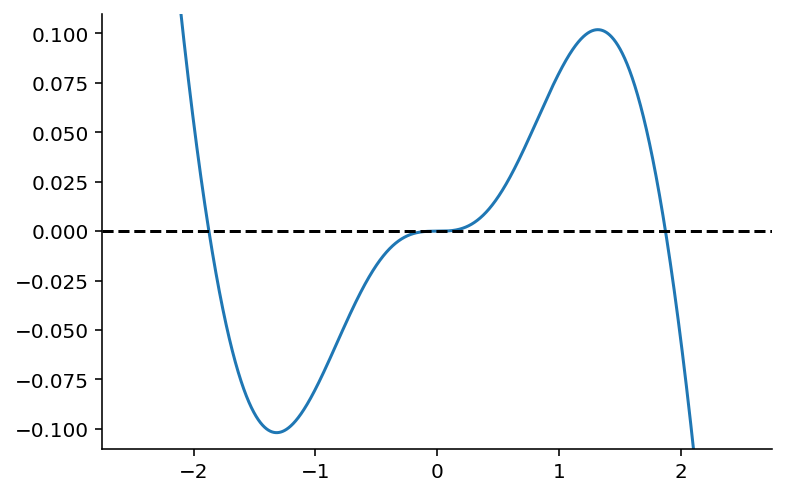

In [199]:
def f(x): return np.sin(x) - np.tanh(x)
xrange = np.linspace(-2.5, 2.5, 50000)

plt.plot(xrange, f(xrange))
plt.axhline(y=0, c="black", linestyle="--")
plt.ylim(-0.11, 0.11)

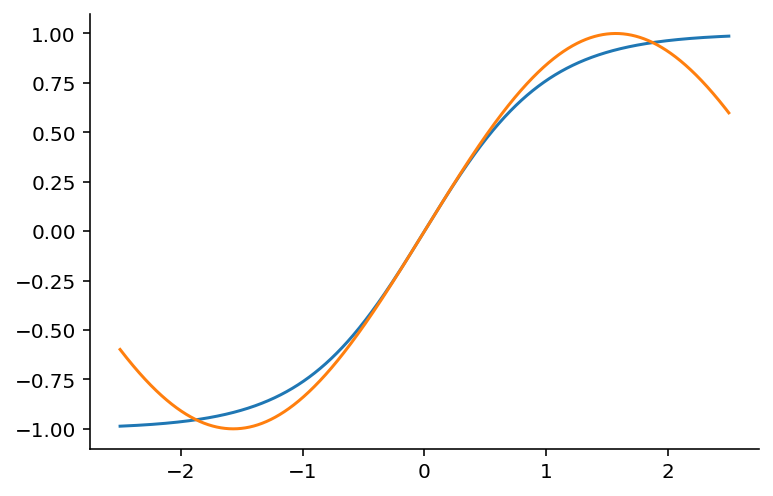

In [200]:
plt.plot(xrange, np.tanh(xrange))
plt.plot(xrange, np.sin(xrange))

In [183]:
x1 = bisection(f, -np.pi, np.pi)
x1

0.0

In [184]:
x2 = bisection(f, -np.pi/2, -np.pi)
x2

-1.8751040687119613

In [185]:
x3 = bisection(f, np.pi/2, np.pi)
x3

1.8751040687119613

In [187]:
def fprime(x): return np.cos(x) - 1 / np.cosh(x) ** 2

In [189]:
fprime(x1)

0.0

In [190]:
fprime(x2)

-0.3894126069127091

In [191]:
fprime(x3)

-0.3894126069127091

## Q1.c

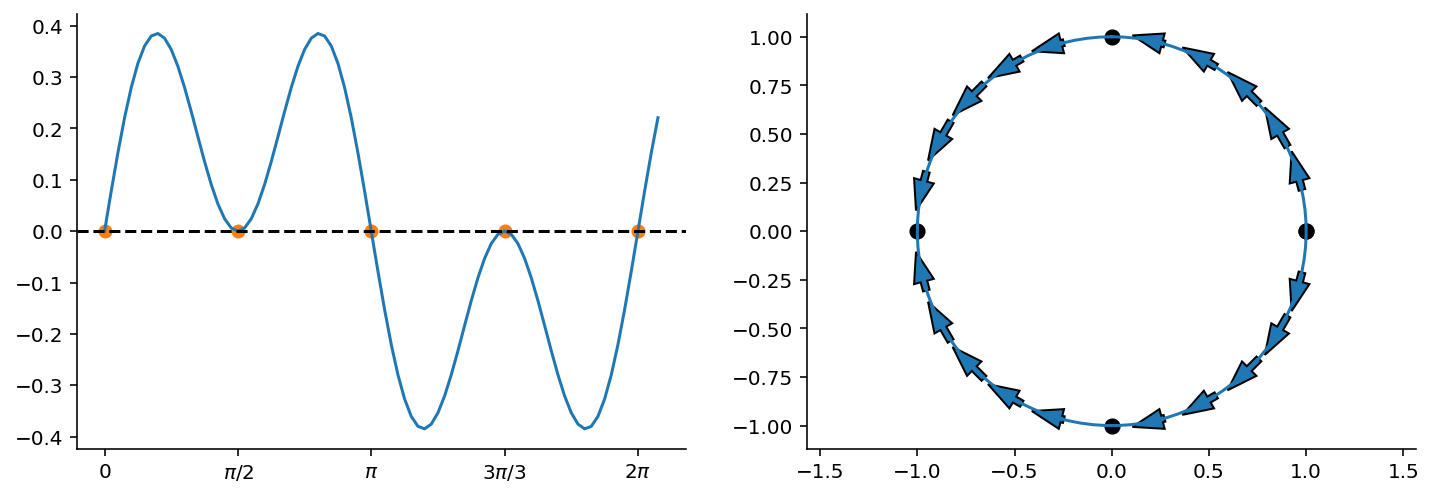

In [245]:
theta_init = np.arange(0, 2 * np.pi + np.pi / (4 * 3), np.pi / (4 * 3))
theta_init2 = np.arange(0, 2 * np.pi + np.pi / (4 * 3), np.pi / (4 * 10))

def f(θ):
    return np.sin(θ + np.pi/2) ** 2 * np.sin(θ)


fixed_points = [0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi]


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
xticks = np.arange(0, 2 * np.pi + np.pi / 2, np.pi / 2)
xticks_labels = [r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi / 3$", r"$2\pi$"]
ax[0].plot(theta_init2, f(theta_init2))
ax[0].axhline(y=0, c="black", linestyle="--")
ax[0].scatter(fixed_points, np.zeros_like(fixed_points), color="tab:orange")
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticks_labels)

dynamics.plot_circular_dynamics(theta_init, f, ax=ax[1])

# Q2

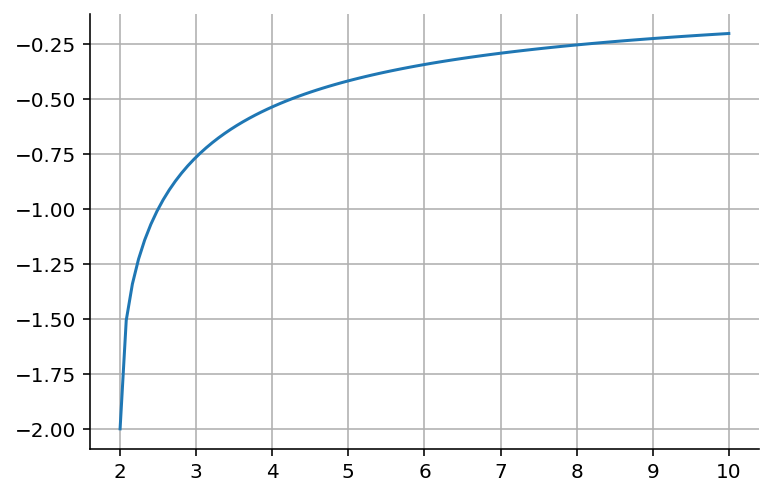

In [298]:
r_vals = np.linspace(2, 10, 100)
plt.plot(r_vals, -r_vals + np.sqrt(r_vals ** 2 - 4))
plt.grid()

In [339]:
r = -4
x_star1 = (-r - np.sqrt(r ** 2 - 4)) / 2
x_star2 = (-r + np.sqrt(r ** 2 - 4)) / 2

In [340]:
x_star1, x_star2

(0.2679491924311228, 3.732050807568877)

In [336]:
f(x_star1, r),  f(x_star2, r)

(0.0, 0.0)

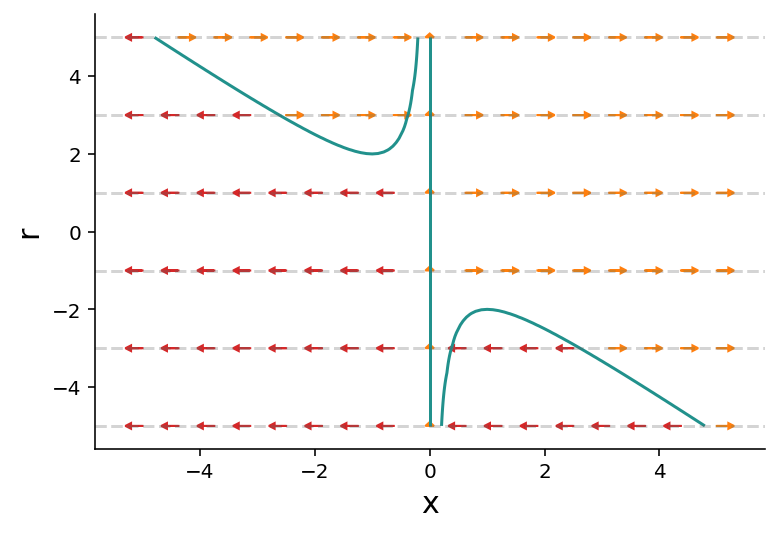

In [395]:
def f(x, r):
    return x*(1 + r * x + x ** 2)

r_vals = np.linspace(-5, 5, 6)
dynamics.plot_bifurcation_diagram(f, r_vals, 17, -5, 5)

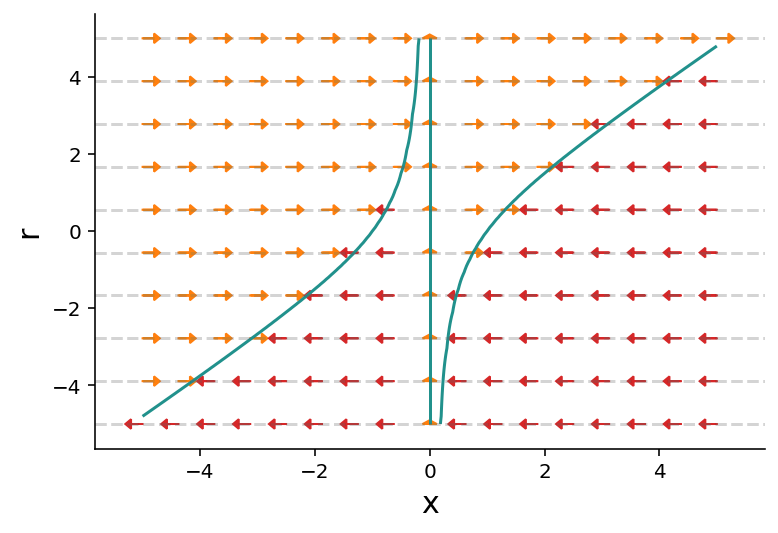

In [386]:
def f(x, r):
    return x*(1 + r * x - x ** 2)

r_vals = np.linspace(-5, 5, 10)
dynamics.plot_bifurcation_diagram(f, r_vals, 17, -5, 5)

(-2.0, 1.9000000000000004, -2.0, 1.9000000000000004)

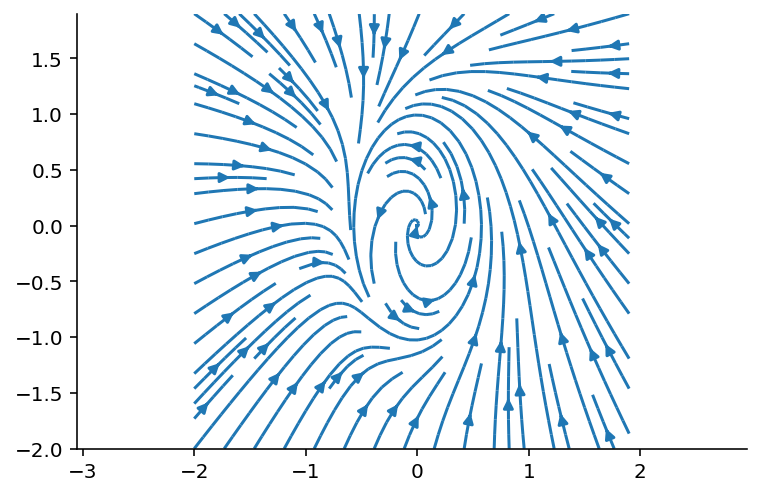

In [418]:
def f(X):
    x, y = X
    xdot = x * (1 - 3 * x ** 2 - y ** 2) - y * (1 + x)
    ydot = y * (1 - 3 * x ** 2 - y ** 2) + 3 * x * (1 + x)
    return xdot, ydot

X = np.mgrid[-2:2:0.1, -2:2:0.1][::-1]

Xdot = np.stack(f(X))
plt.streamplot(*X, *Xdot)

xrange = np.linspace(-4, 4, 100)
plt.axis("equal")

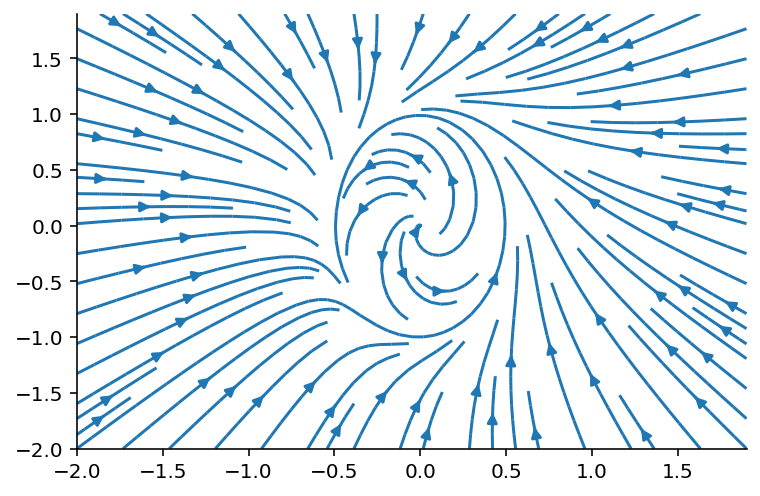

In [414]:
def f(X):
    x, y = X
    xdot = x * (1 - 4 * x ** 2 - y ** 2) - y * (1 + x) / 2
    ydot = y * (1 - 4 * x ** 2 - y ** 2) + 2 * x * (1 + x)
    return xdot, ydot

X = np.mgrid[-2:2:0.1, -2:2:0.1][::-1]

Xdot = np.stack(f(X))
plt.streamplot(*X, *Xdot)

xrange = np.linspace(-3, 3, 100)

<ipython-input-409-7614105355c3>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x) - x + np.log(y) - 2 * y


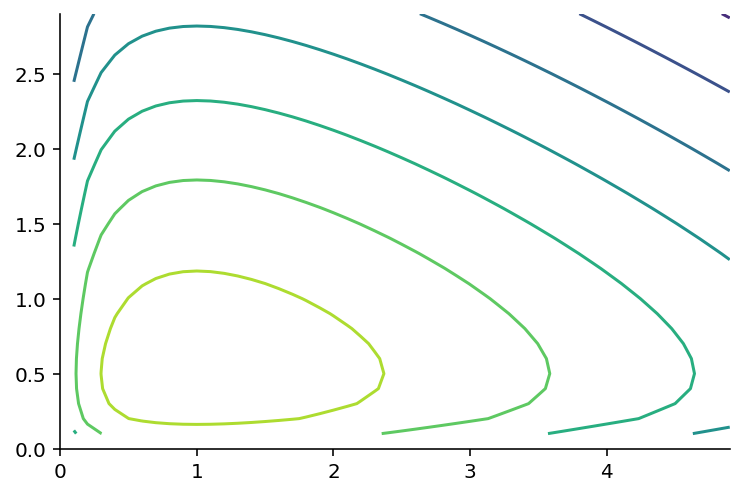

In [409]:
def first_integral(x, y):
    return np.log(x) - x + np.log(y) - 2 * y

X = np.mgrid[0:3:0.1, 0:5:0.1][::-1]
plt.contour(*X, first_integral(*X))